## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Importing Datasets

In [2]:
airlines = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


##### Deleting 'ID#' column, which will not contribute in the model.

In [3]:
airlines.drop(['ID#'], axis = 1,inplace=True)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Insights of data

In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
airlines.shape

(3999, 11)

In [7]:
airlines.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

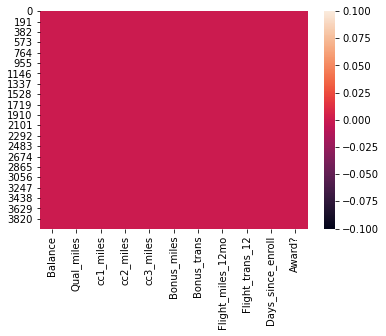

In [8]:
sns.heatmap(airlines.isna())
plt.show()

* No null value in the data.

## EDA

### Finding Correlation between features

In [9]:
airlines.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


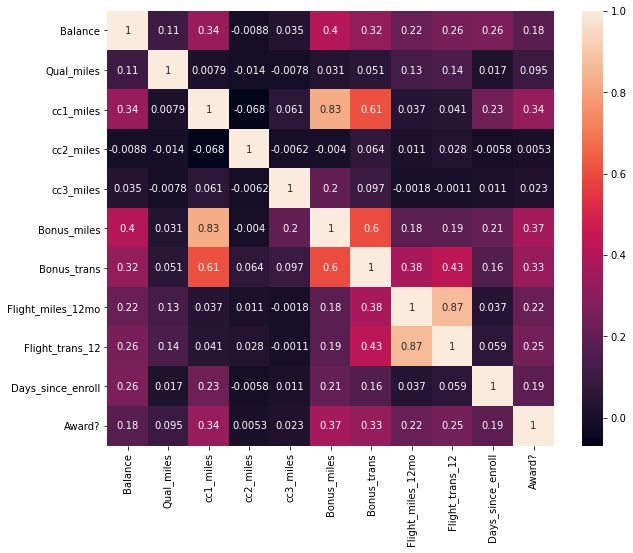

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(airlines.corr(), annot=True)
plt.show()

* From above correlation matrix, it is observed that there is high correlation between 'Flight_miles_12mo' & 'Flight_trans_12'  about 87%. It shows that these features are dependent with each other.


*   Flight_miles_12mo :- Number of flight miles in the past 12 months
    
    Flight_trans_12   :- Number of flight transactions in the past 12 months


* Dropping 'Flight_trans_12'.

In [11]:
airlines.drop(['Flight_trans_12'], axis=1, inplace=True)

In [12]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,7000,0
1,19244,0,1,1,1,215,2,0,6968,0
2,41354,0,1,1,1,4123,4,0,7034,0
3,14776,0,1,1,1,500,1,0,6952,0
4,97752,0,4,1,1,43300,26,2077,6935,1
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1403,1
3995,64385,0,1,1,1,981,5,0,1395,1
3996,73597,0,3,1,1,25447,8,0,1402,1
3997,54899,0,1,1,1,500,1,500,1401,0


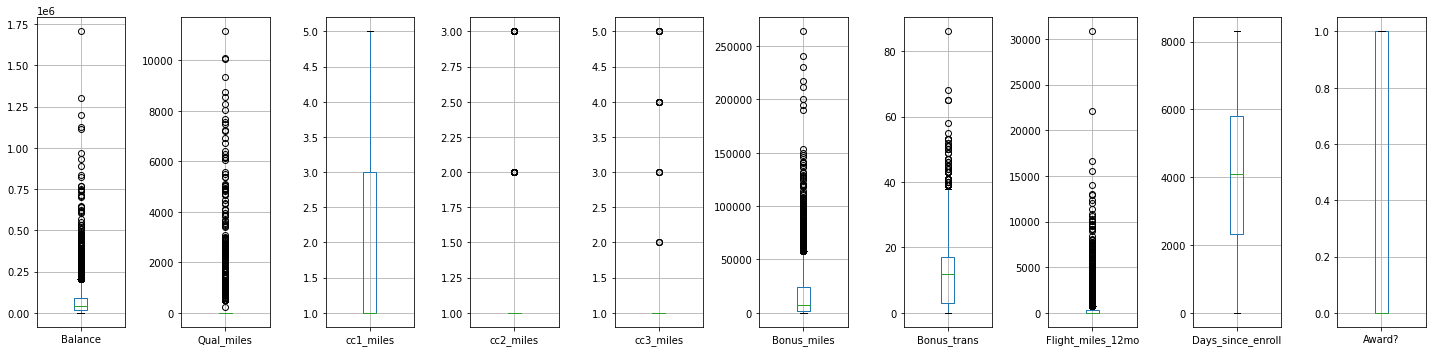

In [13]:
airlines.plot(kind='box', subplots=True, figsize=(20,5), grid=True)
plt.tight_layout()

### Normalizing the data

In [14]:
scaler = MinMaxScaler()
airlines_std = scaler.fit_transform(airlines)
airlines_std = pd.DataFrame(airlines_std, columns=airlines.columns)
airlines_std

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.168676,0.0


### PCA to reduce dimensions

In [15]:
pca = PCA(random_state=40)
pca_values=pca.fit_transform(airlines_std)
pca.explained_variance_ratio_

array([0.5870038 , 0.22941997, 0.12347632, 0.01836185, 0.01168129,
       0.01044514, 0.00714802, 0.00579251, 0.00383032, 0.00284078])

##### Here, it is observed that first '3' principal components are contributing more. So we are considering only 3 components for further model building.

In [16]:
pca_values[:,:3]

array([[-0.40709559, -0.02065796,  0.42194836],
       [-0.40656947, -0.01990678,  0.41746814],
       [-0.40104255, -0.01159164,  0.42373287],
       ...,
       [ 0.60772762, -0.14629963, -0.39776105],
       [-0.50272702, -0.15440543, -0.23129225],
       [-0.5054631 , -0.1579047 , -0.23196843]])

### Creating dataset with reduced dimensions (PCA) 

In [17]:
airlines_pca=pd.DataFrame(pca_values[:,:3], columns=['PC1', 'PC2','PC3'])
airlines_pca

,PC1,PC2,PC3
0,-0.407096,-0.020658,0.421948
1,-0.406569,-0.019907,0.417468
2,-0.401043,-0.011592,0.423733
3,-0.408044,-0.021988,0.416026
4,0.832521,0.240459,0.176629
...,...,...,...
3994,0.398066,-0.587044,-0.276326
3995,0.396945,-0.589040,-0.275522
3996,0.607728,-0.146300,-0.397761
3997,-0.502727,-0.154405,-0.231292


# Model Building

## KMeans Clustering

### 'Elbow' Curve

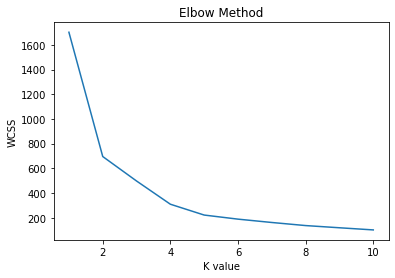

In [18]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=40)
    kmeans.fit(airlines_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

* From this elbow curve, k-value = 3

In [19]:
airlines_kmeans = KMeans(n_clusters=3, random_state=40)
airlines_kmeans.fit(airlines_pca)

KMeans(n_clusters=3, random_state=40)

In [20]:
airlines_kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

#### Adding ClusterID column in the dataset ('ClusterID_kmeans')

In [21]:
airlines['ClusterID_kmeans'] = airlines_kmeans.labels_
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?,ClusterID_kmeans
0,28143,0,1,1,1,174,1,0,7000,0,0
1,19244,0,1,1,1,215,2,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,7034,0,0
3,14776,0,1,1,1,500,1,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,6935,1,1


##### Grouping Clusters

In [22]:
airlines.groupby('ClusterID_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
ClusterID_kmeans,,,,,,,,,,
0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,3619.111755,0.0
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,4625.062120,1.0
2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,4436.307568,0.0


In [23]:
airlines['ClusterID_kmeans'].value_counts()

0    1897
1    1481
2     621
Name: ClusterID_kmeans, dtype: int64

#### Calculating 'Silhouette' score for KMeans clustering

In [24]:
print('Silhouette Score for KMeans clustering : ', round(silhouette_score(airlines_pca, airlines_kmeans.labels_), 4))

Silhouette Score for KMeans clustering :  0.5183


#### Plotting cluster 

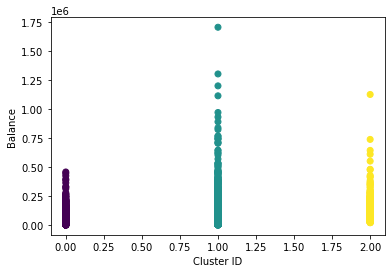

In [25]:
plt.scatter(airlines['ClusterID_kmeans'], airlines['Balance'], c=airlines_kmeans.labels_)
plt.xlabel('Cluster ID')
plt.ylabel('Balance')
plt.show()

## Hierarchical Clustering

In [26]:
airlines.drop(['ClusterID_kmeans'], axis = 1, inplace=True)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,7000,0
1,19244,0,1,1,1,215,2,0,6968,0
2,41354,0,1,1,1,4123,4,0,7034,0
3,14776,0,1,1,1,500,1,0,6952,0
4,97752,0,4,1,1,43300,26,2077,6935,1
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1403,1
3995,64385,0,1,1,1,981,5,0,1395,1
3996,73597,0,3,1,1,25447,8,0,1402,1
3997,54899,0,1,1,1,500,1,500,1401,0


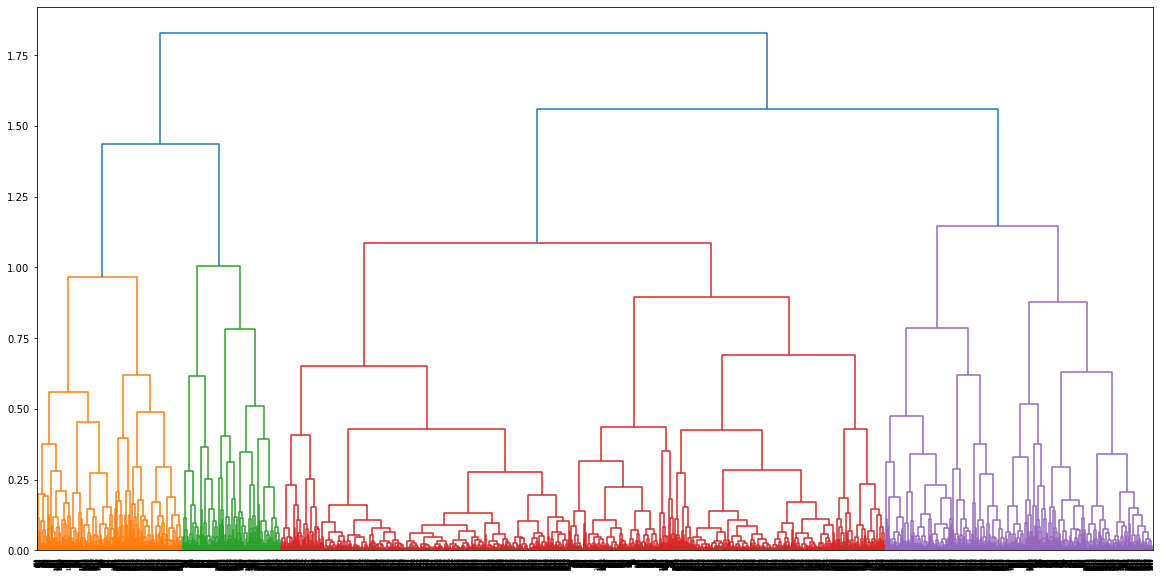

In [27]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(airlines_pca, method='complete'))

##### From the above dendrogram, we are selecting '4' number of clusters.

In [28]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage = 'average')
airlines_hc = hc.fit(airlines_pca)
airlines_hc.labels_

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

#### Adding ClusterID column ('ClusterID_HC')

In [29]:
airlines['ClusterID_HC'] = airlines_hc.labels_
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?,ClusterID_HC
0,28143,0,1,1,1,174,1,0,7000,0,3
1,19244,0,1,1,1,215,2,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,7034,0,3
3,14776,0,1,1,1,500,1,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1403,1,2
3995,64385,0,1,1,1,981,5,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1401,0,3


##### Grouping Clusters

In [30]:
airlines.groupby('ClusterID_HC').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
ClusterID_HC,,,,,,,,,,
0,106818.479297,89.426600,3.228356,1.001255,1.017566,26620.969887,16.511920,198.946048,4376.260979,0.0
1,106599.573923,192.346915,3.802095,1.002328,1.029104,43810.827707,20.015134,708.767171,4939.464494,1.0
2,83869.027331,306.278135,1.086817,1.033762,1.003215,8320.607717,9.937299,1062.906752,4190.863344,1.0
3,38037.078443,86.757699,1.000000,1.019756,1.004648,2635.914003,5.730389,238.956421,3563.348053,0.0


In [31]:
airlines['ClusterID_HC'].value_counts()

3    1721
1     859
0     797
2     622
Name: ClusterID_HC, dtype: int64

#### Calculating 'Silhoutte' score

In [32]:
print('Silhoutte score for Hierarchical Clustering : ', round(silhouette_score(airlines_pca, airlines_hc.labels_),4))

Silhoutte score for Hierarchical Clustering :  0.5012


#### Plotting Cluster

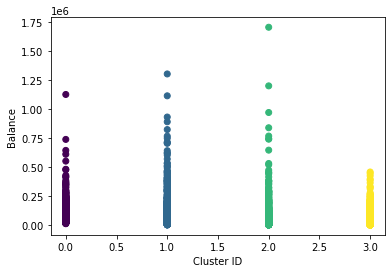

In [33]:
plt.scatter(airlines['ClusterID_HC'], airlines['Balance'], c=airlines_hc.labels_)
plt.xlabel('Cluster ID')
plt.ylabel('Balance')
plt.show()

## Conclusion :

* Silhouette score :
    
    1. KMeans Clustering       :- 0.5183
    
    2. Hierarchical Clustering :- 0.5012
    
* From this, we can say that KMeans clustering model is giving more 'Silhoutte' score.

* So we will be deploying 'KMeans Clustering' in production.